# k-means++

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# youtube動画を表示
import IPython.display
from IPython.display import Image

np.random.seed(777)

# k-means++とランダムな初期値選択の比較
randomとkmeans++との間のクラスタリングの結果を比較します。
k-means++は左上のクラスタを2つに分けてしまう場合があることを確認できます。
※この例ではあえて `max_iter=1` を指定しています。

<Figure size 576x576 with 0 Axes>

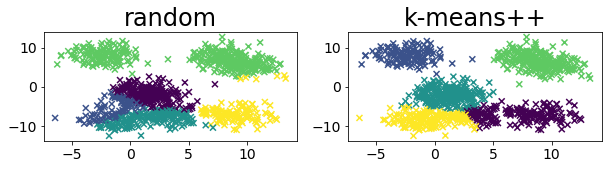

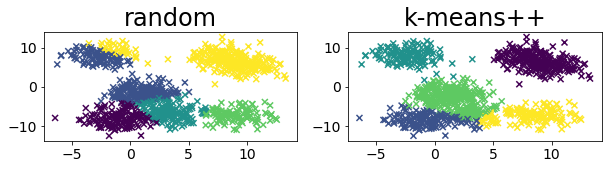

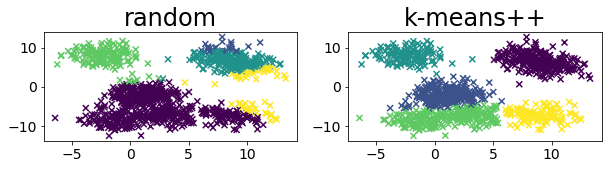

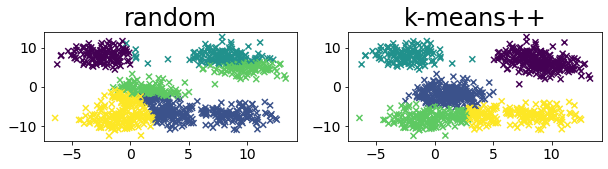

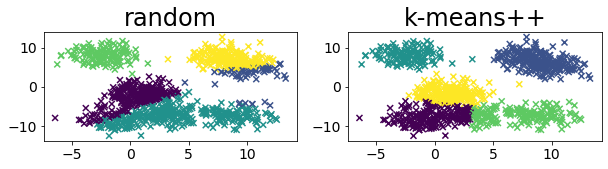

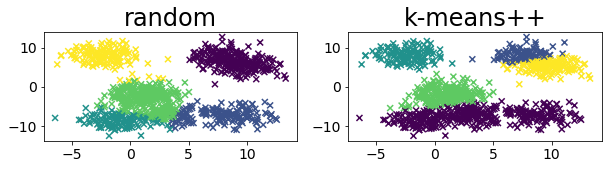

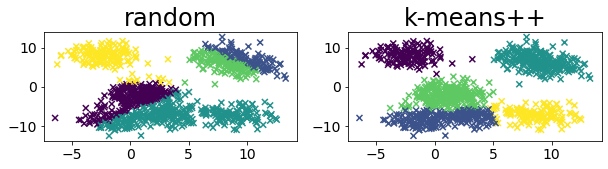

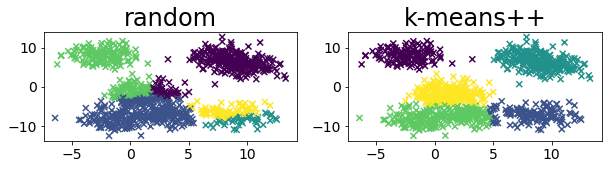

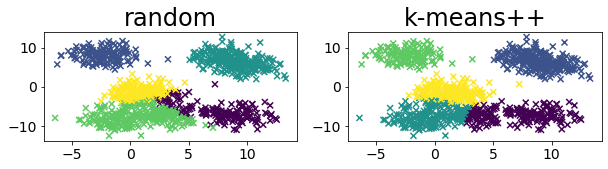

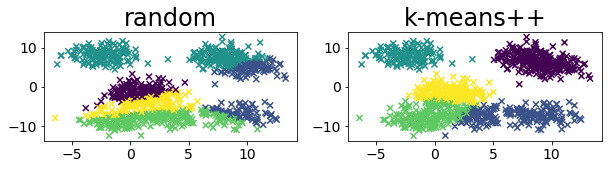

<Figure size 432x288 with 0 Axes>

In [4]:
n_samples = 3000
random_state = 11711
X, y = make_blobs(
    n_samples=n_samples, random_state=random_state, cluster_std=1.5, centers=8
)

plt.figure(figsize=(8, 8))
for i in range(10):
    # random/k-means++を比較, クラスタリングに使用するデータは毎回ランダムに決める
    rand_index = np.random.permutation(1000)
    X_rand = X[rand_index]
    y_pred_rnd = KMeans(
        n_clusters=5, random_state=random_state, init="random", max_iter=1, n_init=1
    ).fit_predict(X_rand)
    y_pred_kpp = KMeans(
        n_clusters=5, random_state=random_state, init="k-means++", max_iter=1, n_init=1
    ).fit_predict(X_rand)

    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    plt.title(f"random")
    plt.scatter(X_rand[:, 0], X_rand[:, 1], c=y_pred_rnd, marker="x")
    plt.subplot(1, 2, 2)
    plt.title(f"k-means++")
    plt.scatter(X_rand[:, 0], X_rand[:, 1], c=y_pred_kpp, marker="x")
    plt.show()

plt.tight_layout()
plt.show()